In [56]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import datetime
import db_plotting

In [57]:

data23 = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
#data22_original = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data22 = pd.read_csv('FlexlabX1aNoLeakBaseline1206.csv', parse_dates = True)
#data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)
day_range=[8,22,23]

# use data23 here as the 1A FLEXLAB test with the 

In [58]:
data22["datetime"]=pd.to_datetime(data22["time"], unit='s',origin='2021-01-01') # change cumulative data to the "date" format

In [59]:
data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])
data22=data22.set_index('datetime')

In [60]:
data22.dtypes

Unnamed: 0                                     int64
time                                         float64
AHU: MAT                                     float64
AHU: RAT                                     float64
VAV: Core Zone Discharge Air Temperature     float64
VAV: North Zone Discharge Air Temperature    float64
VAV: South Zone Discharge Air Temperature    float64
VAV: Core Zone Airflow Rate                  float64
VAV: North Zone Airflow Rate                 float64
VAV: South Zone Airflow Rate                 float64
Outdoor Air Temperature                      float64
VAV: Core Zone Room Air Temperature          float64
VAV: Core Zone Damper Control Signal         float64
VAV: North Zone Room Air Temperature         float64
Tcool_SP                                     float64
Theat_SP                                     float64
VAV: North Zone Damper Control Signal        float64
VAV: South Zone Room Air Temperature         float64
VAV: South Zone Damper Control Signal        f

In [61]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-21 01:00:00           0  20048400.0  57.920044  66.176050   
2021-08-21 01:02:00           3  20048520.0  57.920044  66.106780   
2021-08-21 01:04:00           5  20048640.0  57.920044  66.071730   
2021-08-21 01:05:00           7  20048700.0  57.920044  66.037950   
2021-08-21 01:06:00           8  20048760.0  57.920044  66.004390   
...                         ...         ...        ...        ...   
2021-09-07 23:54:00       31136  21599640.0  68.579800  69.117860   
2021-09-07 23:55:00       31137  21599700.0  68.596664  69.123566   
2021-09-07 23:56:00       31138  21599760.0  68.613690  69.129230   
2021-09-07 23:58:00       31141  21599880.0  68.617050  69.104454   
2021-09-08 00:00:00       31144  21600000.0  68.650720  69.115990   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [62]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [63]:
print(data22[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:02:00           -3.849032e-06                57.919990
2021-08-21 01:04:00           -2.636470e-06                57.919990
2021-08-21 01:05:00           -2.932371e-06                57.919990
2021-08-21 01:06:00           -3.711714e-06                57.919990
2021-08-21 01:08:00           -2.540616e-06                57.919990
2021-08-21 01:10:00           -3.572613e-06                57.919990
2021-08-21 01:12:00           -2.421279e-06                57.919990
2021-08-21 01:14:00           -3.438798e-06                57.919990
2021-08-21 01:15:00           -2.699786e-06                57.919990
2021-08-21 01:16:00           -2.304247e-06                57.919990
2021-08-21 01:18:00           -3.313123e-06                57.919990
2021-08-21 01:20:00           -2.1

In [64]:
#data22['AHU:Cooling Coil Load']=data22['AHU:Cooling Coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Cooling coil Load']=data22['AHU: Cooling coil Load'].resample('15T', label='right', closed='right').mean() 
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Power'].resample('15T', label='right', closed='right').mean() 
 



data22=data22.resample('15T').asfreq()


# I process data to 15 min interval so that the temperature dataset takes current time value
# but energy dataset takes mean value in the past 15 min
# in order to agree with FLEXLAB test data processing

In [65]:
print(data22[['AHU: Cooling coil Load','Outdoor Air Temperature']].head(50))

                     AHU: Cooling coil Load  Outdoor Air Temperature
datetime                                                            
2021-08-21 01:00:00           -2.709269e-06                57.919990
2021-08-21 01:15:00           -3.089187e-06                57.919990
2021-08-21 01:30:00           -1.746978e-06                57.919990
2021-08-21 01:45:00           -1.631427e-05                57.919990
2021-08-21 02:00:00           -1.700000e-05                57.919990
2021-08-21 02:15:00           -1.137672e-01                57.891860
2021-08-21 02:30:00           -2.686695e-01                57.830010
2021-08-21 02:45:00           -2.777121e-01                57.768158
2021-08-21 03:00:00           -1.386757e-01                57.740032
2021-08-21 03:15:00           -1.142656e-03                57.740032
2021-08-21 03:30:00           -1.289450e-05                57.740032
2021-08-21 03:45:00           -8.607115e-07                57.740032
2021-08-21 04:00:00            3.6

In [66]:


data22['datetime']=data22.index
data22['1B-OAT-1']=data22['Outdoor Air Temperature']
# add these columns so that later analysis codes don't return an error

In [67]:
print(data22.isnull().sum())   # normal if everything is zero

Unnamed: 0                                   0
time                                         0
AHU: MAT                                     0
AHU: RAT                                     0
VAV: Core Zone Discharge Air Temperature     0
VAV: North Zone Discharge Air Temperature    0
VAV: South Zone Discharge Air Temperature    0
VAV: Core Zone Airflow Rate                  0
VAV: North Zone Airflow Rate                 0
VAV: South Zone Airflow Rate                 0
Outdoor Air Temperature                      0
VAV: Core Zone Room Air Temperature          0
VAV: Core Zone Damper Control Signal         0
VAV: North Zone Room Air Temperature         0
Tcool_SP                                     0
Theat_SP                                     0
VAV: North Zone Damper Control Signal        0
VAV: South Zone Room Air Temperature         0
VAV: South Zone Damper Control Signal        0
AHU: Cooling coil Load                       0
VAV:Core zone Q                              0
AHU: Outdoor 

In [68]:
print(data22)

                     Unnamed: 0        time   AHU: MAT   AHU: RAT  \
datetime                                                            
2021-08-21 01:00:00           0  20048400.0  57.920044  66.176050   
2021-08-21 01:15:00          19  20049300.0  57.920044  65.797900   
2021-08-21 01:30:00          36  20050200.0  57.920044  65.473040   
2021-08-21 01:45:00          55  20051100.0  57.920044  65.208374   
2021-08-21 02:00:00          72  20052000.0  57.920044  64.985405   
...                         ...         ...        ...        ...   
2021-09-07 23:00:00       31068  21596400.0  63.321800  69.530880   
2021-09-07 23:15:00       31087  21597300.0  63.350914  69.355650   
2021-09-07 23:30:00       31105  21598200.0  64.006960  69.211900   
2021-09-07 23:45:00       31125  21599100.0  68.506580  69.157900   
2021-09-08 00:00:00       31144  21600000.0  68.650720  69.115990   

                     VAV: Core Zone Discharge Air Temperature  \
datetime                             

In [69]:
print(data23)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-20 23:45:00               NaN               NaN               NaN   
2021-08-21 00:00:00         34.139420          8.067873         34.185020   
2021-08-21 00:15:00         34.032287          8.271507         34.119960   
2021-08-21 00:30:00         34.080907          8.123280         34.443220   
2021-08-21 00:45:00         34.109420          8.302420         34.686187   
...                               ...               ...               ...   
2021-09-01 22:45:00         33.714193          8.044007         34.458727   
2021-09-01 23:00:00         33.924427          7.903047         34.677213   
2021-09-01 23:15:00         34.532067          8.139600         34.071793   
2021-09-01 23:30:00         33.790973          7.899593         34.821107   
2021-09-01 23:45:00         33.993833          7.981587         33.682153   

In [70]:

print(data23['1A-El-CHWP'])

time
2021-08-20 23:45:00    53.170039
2021-08-21 00:00:00    53.002608
2021-08-21 00:15:00    53.054407
2021-08-21 00:30:00    52.995898
2021-08-21 00:45:00    53.024932
                         ...    
2021-09-01 22:45:00    53.404302
2021-09-01 23:00:00    53.159955
2021-09-01 23:15:00    53.146679
2021-09-01 23:30:00    53.098214
2021-09-01 23:45:00    53.096476
Name: 1A-El-CHWP, Length: 1153, dtype: float64


In [71]:
data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

In [72]:
baseline_day_mask = (data23['date'] >= datetime.date(2021, 8, 21)) & (data23['date'] <= datetime.date(2021, 8, 21))
test_day_mask22 = (data22['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data22['date'] <= datetime.date(2021, day_range[0], day_range[2])) 
test_day_mask23 = (data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2]))

In [73]:
print(baseline_day_mask)
print(test_day_mask22)
print(test_day_mask23)

time
2021-08-20 23:45:00    False
2021-08-21 00:00:00     True
2021-08-21 00:15:00     True
2021-08-21 00:30:00     True
2021-08-21 00:45:00     True
                       ...  
2021-09-01 22:45:00    False
2021-09-01 23:00:00    False
2021-09-01 23:15:00    False
2021-09-01 23:30:00    False
2021-09-01 23:45:00    False
Name: date, Length: 1153, dtype: bool
datetime
2021-08-21 01:00:00    False
2021-08-21 01:15:00    False
2021-08-21 01:30:00    False
2021-08-21 01:45:00    False
2021-08-21 02:00:00    False
                       ...  
2021-09-07 23:00:00    False
2021-09-07 23:15:00    False
2021-09-07 23:30:00    False
2021-09-07 23:45:00    False
2021-09-08 00:00:00    False
Freq: 15T, Name: date, Length: 1725, dtype: bool
time
2021-08-20 23:45:00    False
2021-08-21 00:00:00    False
2021-08-21 00:15:00    False
2021-08-21 00:30:00    False
2021-08-21 00:45:00    False
                       ...  
2021-09-01 22:45:00    False
2021-09-01 23:00:00    False
2021-09-01 23:15:00    F

In [74]:
data_baseline0=data23[baseline_day_mask]
data22 = data22[test_day_mask22]
data23 = data23[test_day_mask23]
#print(data_baseline0)

In [75]:
data_baseline0A=data_baseline0.copy(deep=True)
data_baseline0B=data_baseline0.copy(deep=True)



In [76]:
data_baseline0A.index=data_baseline0A.index+pd.to_timedelta(1,unit='d')

data_baseline0B.index=data_baseline0B.index+pd.to_timedelta(2,unit='d')
#data_baseline = data_baseline0A
data_baseline = data_baseline0A.append(data_baseline0B)
#data_baseline = pd.concat(frames)


# here I use the temperature setpoint data from date 08/21/2021 as the baseline temperature setpoint for the model 
# data (data22). I need to manually increment the days to match up the datatime for later plotting use

In [77]:
print(data_baseline)

                     desk1_plug_power  desk2_plug_power  desk3_plug_power  \
time                                                                        
2021-08-22 00:00:00         34.139420          8.067873         34.185020   
2021-08-22 00:15:00         34.032287          8.271507         34.119960   
2021-08-22 00:30:00         34.080907          8.123280         34.443220   
2021-08-22 00:45:00         34.109420          8.302420         34.686187   
2021-08-22 01:00:00         34.337320          7.940947         34.927867   
...                               ...               ...               ...   
2021-08-23 22:45:00         33.842467          8.092507         34.662933   
2021-08-23 23:00:00         34.225773          8.136513         34.559740   
2021-08-23 23:15:00         33.781613          7.943327         34.009013   
2021-08-23 23:30:00         34.386813          7.963047         34.448420   
2021-08-23 23:45:00         33.785427          8.199240         34.636660   

In [78]:
data22['gta_window'] = 0
data23['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)




gta_ts = (data23['time'] > gta_st) & (data23['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
data23['gta_window'][gta_ts] = 1

print(data22['gta_window'][gta_ts])
print(data23['gta_window'][gta_ts])

datetime
2021-08-22 14:15:00    1
2021-08-22 14:30:00    1
2021-08-22 14:45:00    1
2021-08-22 15:00:00    1
2021-08-22 15:15:00    1
2021-08-22 15:30:00    1
2021-08-22 15:45:00    1
2021-08-22 16:00:00    1
2021-08-22 16:15:00    1
2021-08-22 16:30:00    1
2021-08-22 16:45:00    1
2021-08-22 17:00:00    1
2021-08-22 17:15:00    1
2021-08-22 17:30:00    1
2021-08-22 17:45:00    1
2021-08-22 18:00:00    1
2021-08-23 14:15:00    1
2021-08-23 14:30:00    1
2021-08-23 14:45:00    1
2021-08-23 15:00:00    1
2021-08-23 15:15:00    1
2021-08-23 15:30:00    1
2021-08-23 15:45:00    1
2021-08-23 16:00:00    1
2021-08-23 16:15:00    1
2021-08-23 16:30:00    1
2021-08-23 16:45:00    1
2021-08-23 17:00:00    1
2021-08-23 17:15:00    1
2021-08-23 17:30:00    1
2021-08-23 17:45:00    1
2021-08-23 18:00:00    1
Name: gta_window, dtype: int64
time
2021-08-22 14:15:00    1
2021-08-22 14:30:00    1
2021-08-22 14:45:00    1
2021-08-22 15:00:00    1
2021-08-22 15:15:00    1
2021-08-22 15:30:00    1
2021-

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/484888820.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/484888820.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data23['gta_window'][gta_ts] = 1


In [79]:
data22['date']

datetime
2021-08-22 00:00:00    2021-08-22
2021-08-22 00:15:00    2021-08-22
2021-08-22 00:30:00    2021-08-22
2021-08-22 00:45:00    2021-08-22
2021-08-22 01:00:00    2021-08-22
                          ...    
2021-08-23 22:45:00    2021-08-23
2021-08-23 23:00:00    2021-08-23
2021-08-23 23:15:00    2021-08-23
2021-08-23 23:30:00    2021-08-23
2021-08-23 23:45:00    2021-08-23
Freq: 15T, Name: date, Length: 192, dtype: object

In [80]:
print(data22.columns)
print(data23.columns)
#print(data22_original.columns)

Index(['Unnamed: 0', 'time', 'AHU: MAT', 'AHU: RAT',
       'VAV: Core Zone Discharge Air Temperature',
       'VAV: North Zone Discharge Air Temperature',
       'VAV: South Zone Discharge Air Temperature',
       'VAV: Core Zone Airflow Rate', 'VAV: North Zone Airflow Rate',
       'VAV: South Zone Airflow Rate', 'Outdoor Air Temperature',
       'VAV: Core Zone Room Air Temperature',
       'VAV: Core Zone Damper Control Signal',
       'VAV: North Zone Room Air Temperature', 'Tcool_SP', 'Theat_SP',
       'VAV: North Zone Damper Control Signal',
       'VAV: South Zone Room Air Temperature',
       'VAV: South Zone Damper Control Signal', 'AHU: Cooling coil Load',
       'VAV:Core zone Q', 'AHU: Outdoor Air Damper Position',
       'AHU: Supply Fan Power', 'AHU: Supply Fan Airflow Rate',
       'AHU: Cooling Coil Control Signal', 'VAV:North zone Q',
       'VAV:South zone Q', 'datetime', '1B-OAT-1', 'date', 'gta_window'],
      dtype='object')
Index(['desk1_plug_power', 'desk2_plug

### Metrics

In [81]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9


In [82]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['AHU: Cooling coil Load']/data22['COP'])


# if change to 1/1.225, can comment out the first 2 lines
#data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/1.225/1.225))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x))
data22['AHU: Supply Fan Airflow Rate']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (x/2118.8))
data22['AHU: Supply Fan Power']=data22['AHU: Supply Fan Airflow Rate'].apply(lambda x: (-391*x**2+687*x+140))

data22['cooling_power [W]'] = data22['AHU: Supply Fan Power'] + data22['Chiller_load']

data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['1A-Th-Chilled Water']/data23['COP'])*-1
data23['cooling_power [W]'] = data23['1A-El-AHU'] + data23['Chiller_load']
#data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

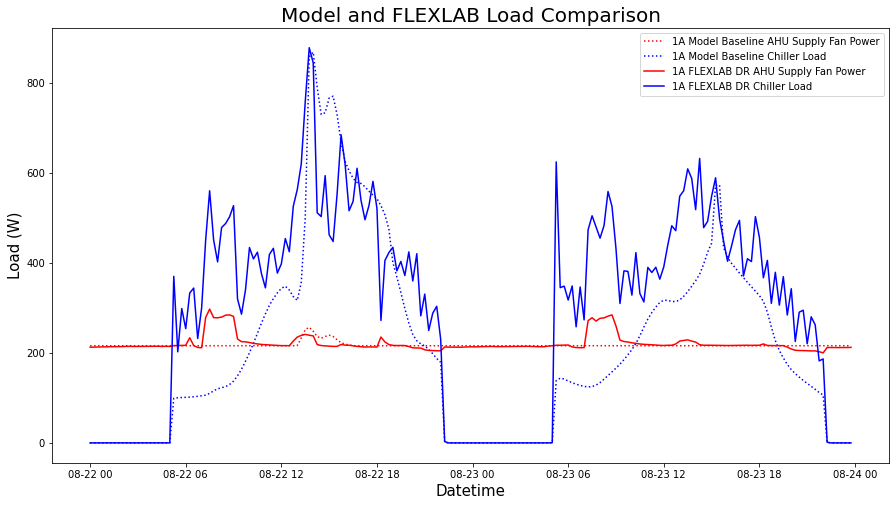

In [83]:
#data22['AHU: Supply Fan Power'].plot(kind='line',figsize=(15,8),legend=True)
#data22['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)
#data23['1A-El-AHU'].plot(kind='line',figsize=(15,8),legend=True)
#data23['Chiller_load'].plot(kind='line',figsize=(15,8),legend=True)

#data22_original['1A-El-CHWP'].plot(kind='line',figsize=(15,8),legend=True)
#data22_original['1A-El-Exhaust Fan'].plot(kind='line',figsize=(15,8),legend=True)






fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['AHU: Supply Fan Power'],'r:',label="1A Model Baseline AHU Supply Fan Power")
lns2=ax_left.plot(data22.index,data22['Chiller_load'],'b:', label="1A Model Baseline Chiller Load")
lns3=ax_left.plot(data23.index,data23['1A-El-AHU'],'r-', label="1A FLEXLAB DR AHU Supply Fan Power")
lns4=ax_left.plot(data23.index,data23['Chiller_load'],'b-', label="1A FLEXLAB DR Chiller Load")
plt.title('Model and FLEXLAB Load Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Load (W)',fontsize=15)

lns=lns1+lns2+lns3+lns4
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
#ax_left.set_ylim([50,68.3])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

In [84]:


en_1a = []
en_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data23['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
    
print(en_1a)
print(en_1b)

22
23
[11.22, 9.48]
[12.85, 12.21]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


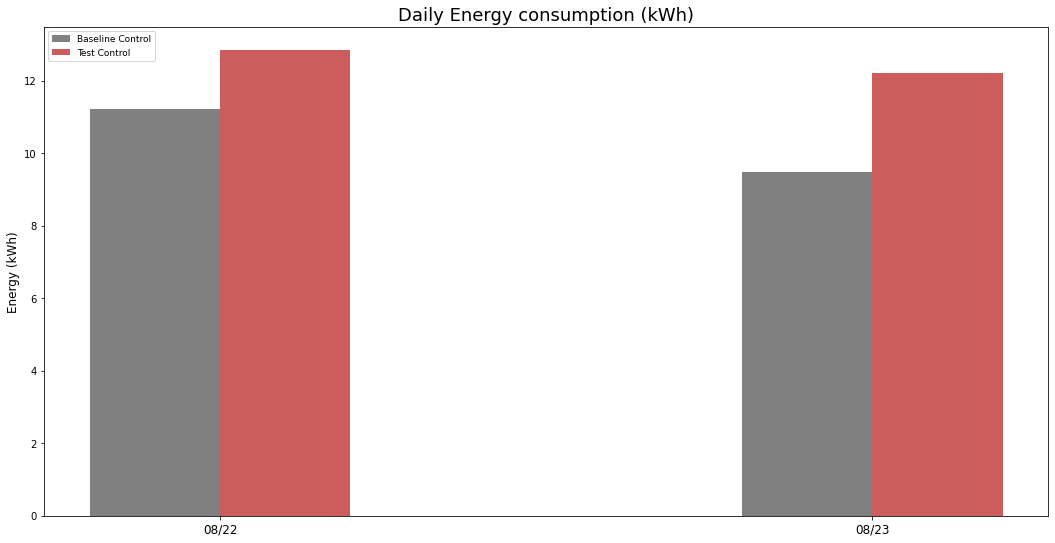

In [85]:
db_plotting.energy_plot(data23, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [86]:
#data23['G36 Demand Shed'] = data23['cooling_power [W]'] - data22['cooling_power [W]']

shed_1a = []
shed_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)


    #day_shed_1b = (data23['G36 Demand Shed'][mask_1][gta_ts].mean())
    #shed_1b.append(day_shed_1b)

In [87]:
data22['cooling_power [W]'][mask_1][gta_ts]

datetime
2021-08-23 14:15:00    590.464821
2021-08-23 14:30:00    612.660656
2021-08-23 14:45:00    639.010738
2021-08-23 15:00:00    659.376652
2021-08-23 15:15:00    787.949981
2021-08-23 15:30:00    788.169027
2021-08-23 15:45:00    649.597802
2021-08-23 16:00:00    628.053708
2021-08-23 16:15:00    614.703412
2021-08-23 16:30:00    603.849444
2021-08-23 16:45:00    592.909352
2021-08-23 17:00:00    582.574090
2021-08-23 17:15:00    572.335773
2021-08-23 17:30:00    562.517810
2021-08-23 17:45:00    552.488866
2021-08-23 18:00:00    542.937674
Freq: 15T, Name: cooling_power [W], dtype: float64

In [88]:
#print(data23['G36 Demand Shed'][gta_ts])
#print(data23['G36 Demand Shed'])

In [89]:
def shed_demand_plot(data, list_1, list_2, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    #for i in range(0,len(inp_day)-1):
        #labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    #x = np.arange(len(labels)-1)
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Baseline Control', color = 'dodgerblue')
    ax.bar(x+width*.5, list_2, width = width, label='Test Control', color = 'mediumseagreen')

    ax.set_xticks(range(len(labels)))
    #ax.set_xticks(range(len(labels)-1))
    ax.set_xticklabels(labels, fontsize = 12)
    #ax.set_xticklabels(labels[1:len(labels)+1], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

In [90]:
print(shed_1a)

[872.1694065658676, 623.724987923937]


In [91]:
print(shed_1b)

[758.6352602893335, 693.7595732617453]


['08/22', '08/23']
[758.6352602893335, 693.7595732617453]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/3893193546.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


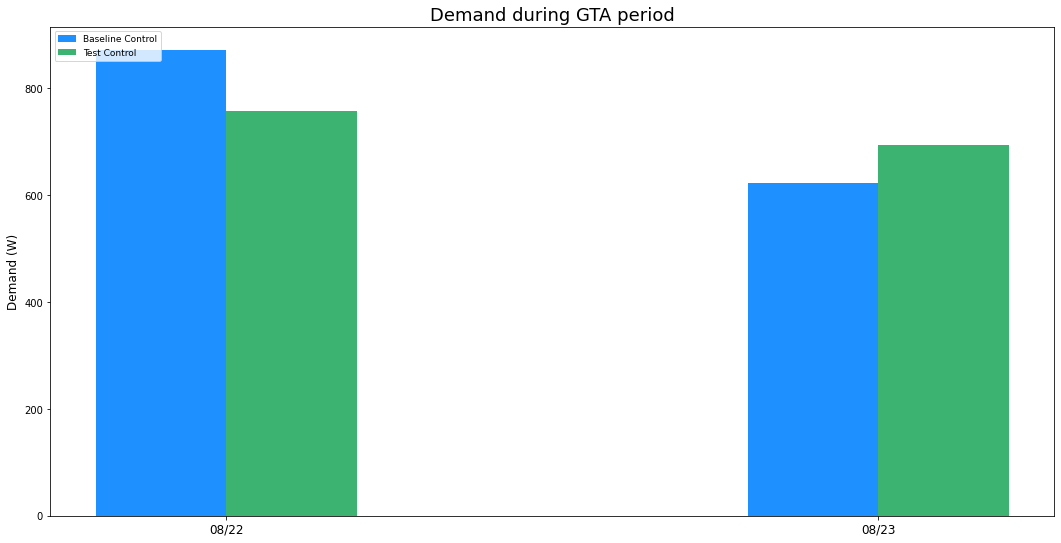

In [92]:

shed_demand_plot(data23, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### Thermal comfort

In [93]:
data22 = data22.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [94]:
data22['nor_zat_deg'] = zat_col(data22['VAV: North Zone Room Air Temperature'], data_baseline['1A-VAV1-OccupiedCoolingSetpt'])
data22['cor_zat_deg'] = zat_col(data22['VAV: Core Zone Room Air Temperature'], data_baseline['1A-VAV2-OccupiedCoolingSetpt'])
data22['sou_zat_deg'] = zat_col(data22['VAV: South Zone Room Air Temperature'], data_baseline['1A-VAV3-OccupiedCoolingSetpt'])

data23['nor_zat_deg'] = zat_col(data23['1A-VAV1-Zn_Temp'], data23['1A-VAV1-OccupiedCoolingSetpt'])
data23['cor_zat_deg'] = zat_col(data23['1A-VAV2-Zn_Temp'], data23['1A-VAV2-OccupiedCoolingSetpt'])
data23['sou_zat_deg'] = zat_col(data23['1A-VAV3-Zn_Temp'], data23['1A-VAV3-OccupiedCoolingSetpt'])



In [95]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        

    return(overshoot, mean, median, std)

In [96]:
data22_nor_zat_deg, data22_nor_mean, data22_nor_median, data22_nor_std = calc_stats(data22, data22['nor_zat_deg'])
data22_cor_zat_deg, data22_cor_mean, data22_cor_median, data22_cor_std = calc_stats(data22, data22['cor_zat_deg'])
data22_sou_zat_deg, data22_sou_mean, data22_sou_median, data22_sou_std = calc_stats(data22, data22['sou_zat_deg'])

data23_nor_zat_deg, data23_nor_mean, data23_nor_median, data23_nor_std = calc_stats(data23, data23['nor_zat_deg'])
data23_cor_zat_deg, data23_cor_mean, data23_cor_median, data23_cor_std = calc_stats(data23, data23['cor_zat_deg'])
data23_sou_zat_deg, data23_sou_mean, data23_sou_median, data23_sou_std = calc_stats(data23, data23['sou_zat_deg'])

In [97]:
print(data22_nor_zat_deg, data22_nor_mean, data23_nor_median, data23_nor_std)

[0.0, 0.0] [0.0, 0.0] [0.0, 0.0] [0.0, 0.0]


In [98]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data22, data22['nor_zat_deg'])
scenario_dict[2] = calc_stats(data22, data22['cor_zat_deg'])
scenario_dict[3] = calc_stats(data22, data22['sou_zat_deg'])

scenario_dict[4] = calc_stats(data23, data23['nor_zat_deg'])
scenario_dict[5] = calc_stats(data23, data23['cor_zat_deg'])
scenario_dict[6] = calc_stats(data23, data23['sou_zat_deg'])

In [99]:
scenario_dict = {'data22': {"nor": calc_stats(data22, data22['nor_zat_deg']),
                            "cor": calc_stats(data22, data22['cor_zat_deg']), 
                            "sou": calc_stats(data22, data22['sou_zat_deg'])}, 
                 
                 'data23': {"nor": calc_stats(data23, data23['nor_zat_deg']),
                            "cor": calc_stats(data23, data23['cor_zat_deg']), 
                            "sou": calc_stats(data23, data23['sou_zat_deg'])}}

In [100]:
print(scenario_dict['data23']['sou'])
print(scenario_dict['data23']['sou'][0][1:5])

([0.17361111111111338, 0.06250000000000355], [0.014172335600907214, 0.005102040816326821], [0.0, 0.0], [0.04309378864722256, 0.02484097401652986])
[0.06250000000000355]


In [101]:
print(sum(data22_nor_zat_deg), sum(data23_nor_zat_deg))
print(sum(data22_cor_zat_deg), sum(data23_cor_zat_deg))
print(sum(data22_sou_zat_deg), sum(data23_sou_zat_deg))

0.0 0.0
0.0 0.0
0.1639272222222239 0.23611111111111693


In [102]:
print(data22_nor_zat_deg,data22_cor_zat_deg,data22_sou_zat_deg)
print(data23_nor_zat_deg,data23_cor_zat_deg,data23_sou_zat_deg)

[0.0, 0.0] [0.0, 0.0] [0.1639272222222239, 0.0]
[0.0, 0.0] [0.0, 0.0] [0.17361111111111338, 0.06250000000000355]


In [103]:
import matplotlib.dates as mdates

def thermal_comfort_plot(data_1, inp_1, inp_2, inp_3, inp_4, inp_5, inp_6, scenario_dict, metric, ylabel, title_dict):
    
    # data_1 is the full RAW data, have 6 inputs, 
    
    fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',
                                       figsize = (18,9))
    
    
    
    fig.subplots_adjust(hspace = .2, wspace=.15)
    # so the row is 3 and columns is 1 

    inp_day = data_1['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list for unique days
    
    
    import datetime
    for i in range(len(inp_day)):
        inp_day[i]=datetime.datetime.combine(inp_day[i], datetime.datetime.min.time())

    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    print(labels) # print out the variable "labels" with unique days

    x = np.array(inp_day)
    
    print(x)
    print(inp_1[metric][0:len(labels)+1])# print the 0:overshoot, 1:mean data for all days from the first input
    
    shift1 = datetime.timedelta(hours = 1.5)
    shift2 = datetime.timedelta(hours = 4.5)
    width = datetime.timedelta(hours = 3)
    
    #ax.xaxis_date()
    ax.get_xaxis().set_visible(False)
    ax02 = ax.twinx()
    ax02.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    ax.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    ax12 = ax1.twinx()
    ax12.plot(data_1['1B-OAT-1'])
    ax1.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax1.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    
    
    # plot 3rd and 4th input of the 0:overshoot, 1:mean data 
    
    
    ax22 = ax2.twinx()
    ax22.plot(data_1['1B-OAT-1'])
    ax2.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax2.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    
    
    # plot 5th and 6th input of the 0:overshoot, 1:mean data 
    fig.suptitle(title_dict, fontsize = 18)  # title for the full plot
    
    ax.set_title('North zone', fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 9)
    ax.legend(fontsize = 9, loc = 2)
    if metric == 0:
        ax.set_ylim(0,2.5)
    else:
        ax.set_ylim(0,0.5)

    
    ax1.legend(fontsize = 9, loc = 2)
    ax1.set_title('Core zone', fontsize = 16)
    ax1.set_ylabel(ylabel, fontsize = 9)
    if metric == 0:
        ax1.set_ylim(0,2.5)
    else:
        ax1.set_ylim(0,0.5)
        
    ax1.get_xaxis().set_visible(False)

    ax2.legend(fontsize = 9, loc = 2)
    ax2.set_title('South zone', fontsize = 16)
    ax2.set_ylabel(ylabel, fontsize = 9)
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax2.set_ylim(0,2.5)
    else:
        ax2.set_ylim(0,0.5)
        
        # above sets the y limit and legend font size...
        
        
    
    #ax2.xaxis_date()
    ax2.set_xticklabels(labels, fontsize = 12)

    ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax2.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!

['08/22', '08/23']
[datetime.datetime(2021, 8, 22, 0, 0) datetime.datetime(2021, 8, 23, 0, 0)]
[0.0, 0.0]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/2005965882.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/2005965882.py:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize = 12)


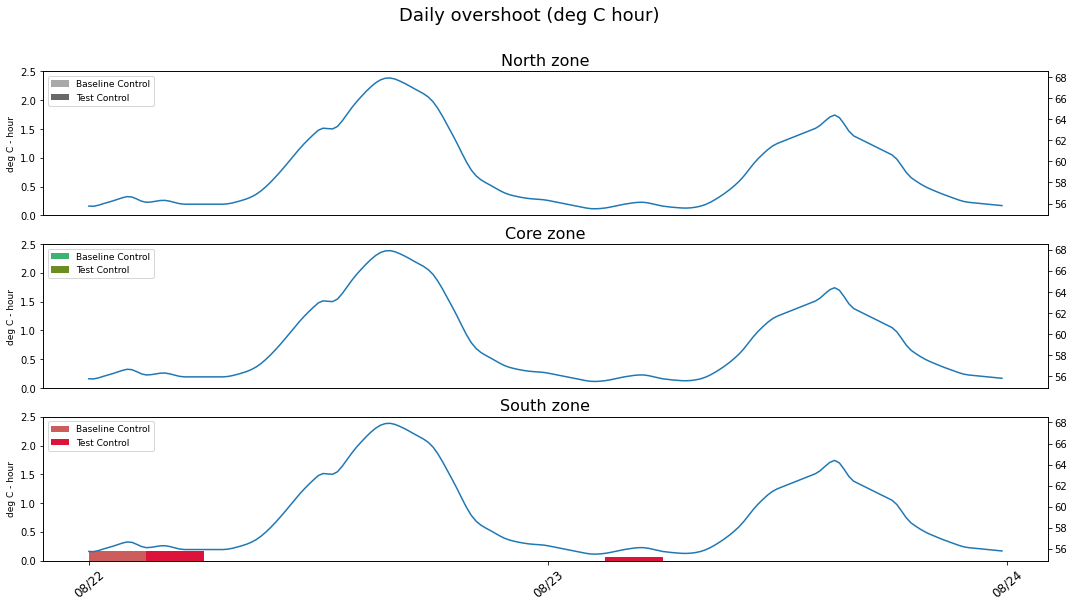

In [104]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
thermal_comfort_plot(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 0, ylabel[1], title_dict[1])

# Zone Air Temperature

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_856/1970640757.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .4, wspace=.15)


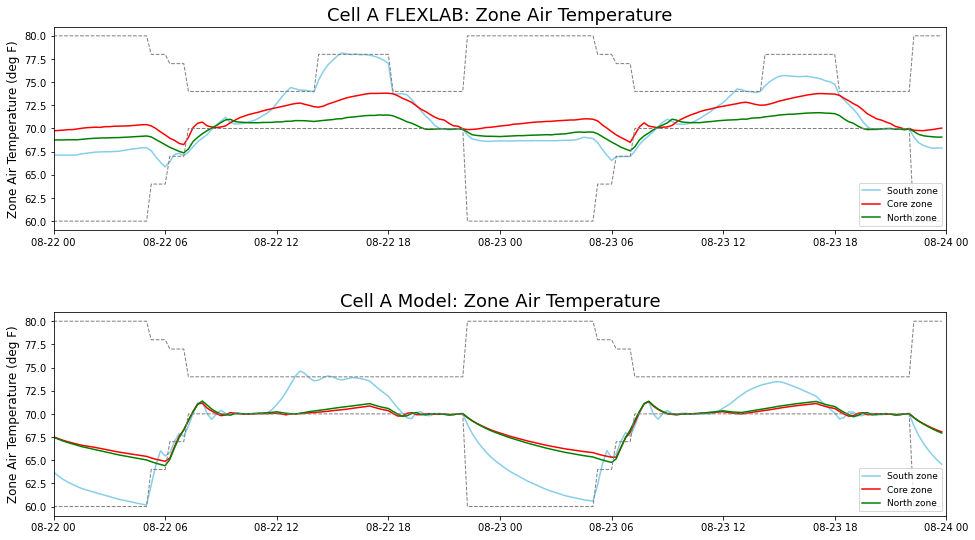

In [105]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data23['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data23['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data23['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data23['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data23['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data22['VAV: South Zone Room Air Temperature'], label = 'South zone', color = 'skyblue')
ax.plot(data22['VAV: Core Zone Room Air Temperature'], label = 'Core zone', color = 'red')
ax.plot(data22['VAV: North Zone Room Air Temperature'], label = 'North zone', color = 'green')
ax.plot(data_baseline['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data_baseline['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell A FLEXLAB: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A Model: Zone Air Temperature', fontsize = 18)

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
ax.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)])


#ax1.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"]) 
#ax.set_xlim(["2021-08-20 08:50:00"],["2021-08-22 00:00:00"])

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)

In [106]:
data23['1A-VAV1-VAVActuatorPosition'] = data23['1A-VAV1-VAVActuatorPosition'].apply(lambda x: x/100)
data23['1A-VAV2-VAVActuatorPosition'] = data23['1A-VAV2-VAVActuatorPosition'].apply(lambda x: x/100)
data23['1A-VAV3-VAVActuatorPosition'] = data23['1A-VAV3-VAVActuatorPosition'].apply(lambda x: x/100)

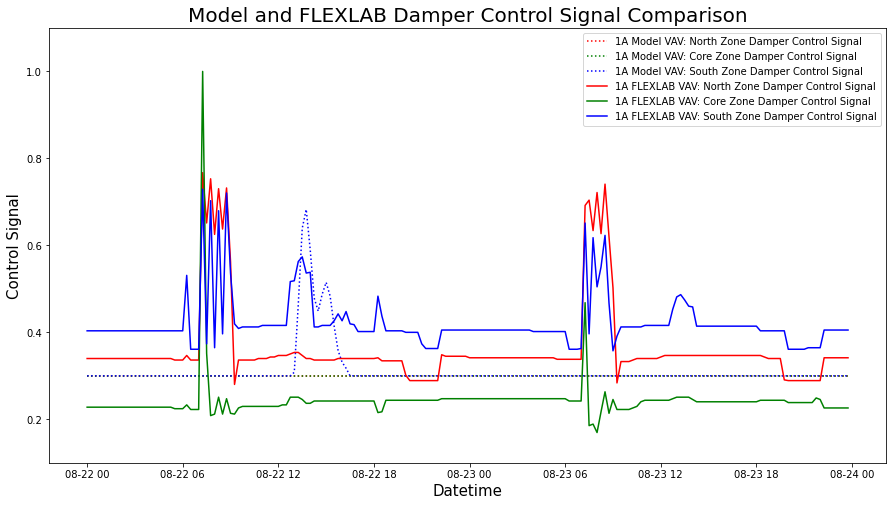

In [107]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
lns2=ax_left.plot(data22.index,data22['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns3=ax_left.plot(data22.index,data22['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

lns4=ax_left.plot(data23.index,data23['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
lns5=ax_left.plot(data23.index,data23['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
lns6=ax_left.plot(data23.index,data23['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

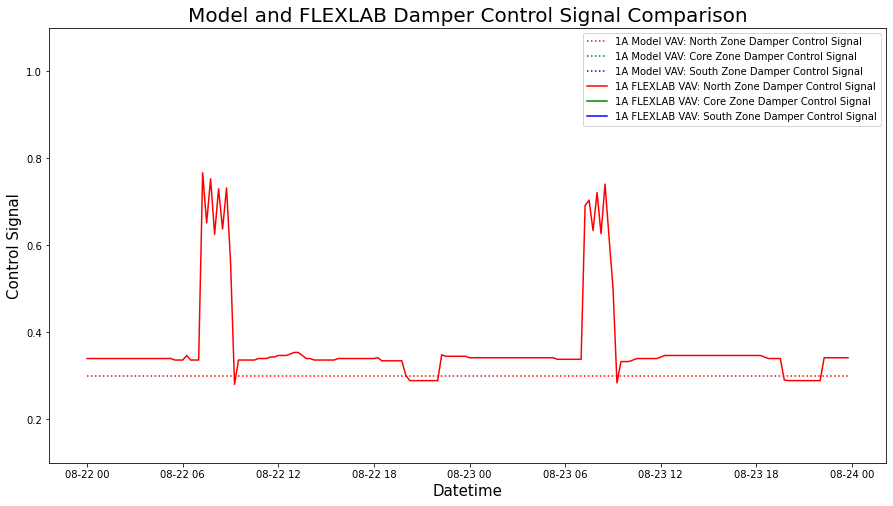

In [108]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

lns1=ax_left.plot(data22.index,data22['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data22.index,data22['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
#lns3=ax_left.plot(data22.index,data22['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

lns4=ax_left.plot(data23.index,data23['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data23.index,data23['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
#lns6=ax_left.plot(data23.index,data23['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

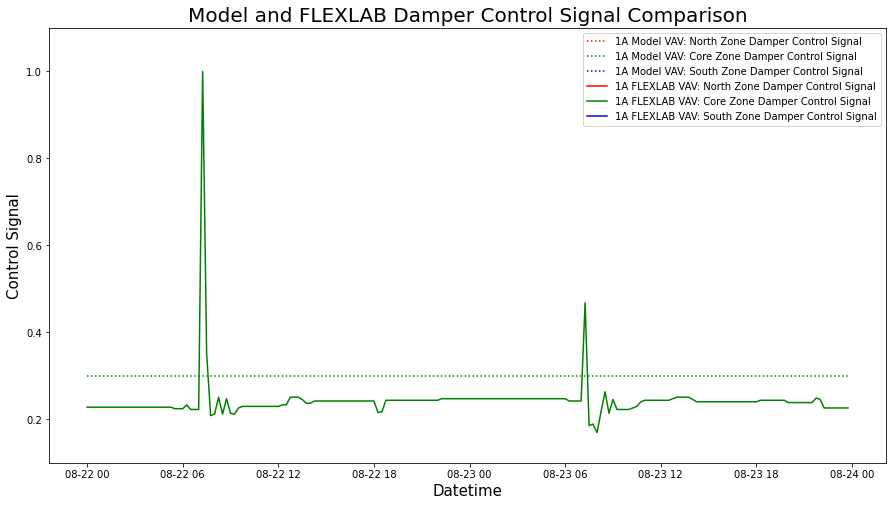

In [109]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data22.index,data22['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
lns2=ax_left.plot(data22.index,data22['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
#lns3=ax_left.plot(data22.index,data22['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

#lns4=ax_left.plot(data23.index,data23['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
lns5=ax_left.plot(data23.index,data23['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
#lns6=ax_left.plot(data23.index,data23['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()

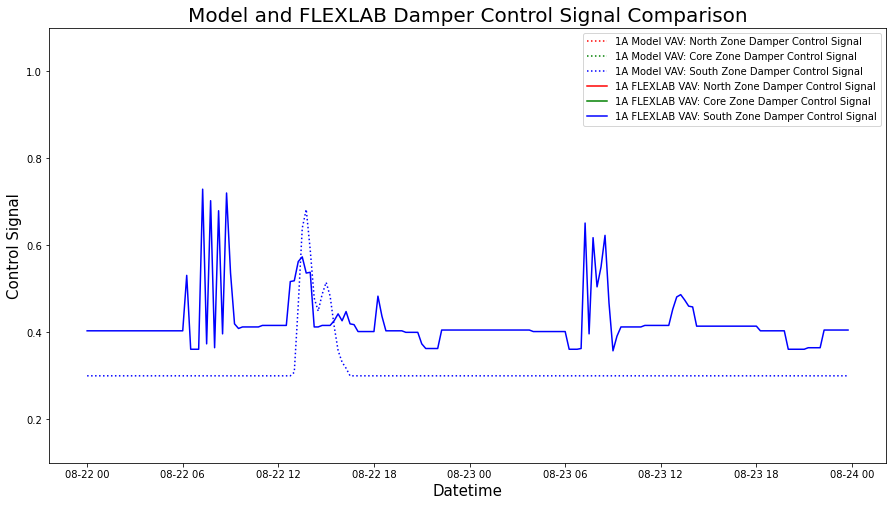

In [110]:
fig,ax_left=plt.subplots()

fig.set_size_inches(15, 8)

#lns1=ax_left.plot(data22.index,data22['VAV: North Zone Damper Control Signal'],'r:',label="1A Model VAV: North Zone Damper Control Signal")
#lns2=ax_left.plot(data22.index,data22['VAV: Core Zone Damper Control Signal'],'g:', label="1A Model VAV: Core Zone Damper Control Signal")
lns3=ax_left.plot(data22.index,data22['VAV: South Zone Damper Control Signal'],'b:', label="1A Model VAV: South Zone Damper Control Signal")

#lns4=ax_left.plot(data23.index,data23['1A-VAV1-VAVActuatorPosition'],'r-',label="1A FLEXLAB VAV: North Zone Damper Control Signal")
#lns5=ax_left.plot(data23.index,data23['1A-VAV2-VAVActuatorPosition'],'g-', label="1A FLEXLAB VAV: Core Zone Damper Control Signal")
lns6=ax_left.plot(data23.index,data23['1A-VAV3-VAVActuatorPosition'],'b-', label="1A FLEXLAB VAV: South Zone Damper Control Signal")

plt.title('Model and FLEXLAB Damper Control Signal Comparison',fontsize=20)
ax_left.set_xlabel('Datetime',fontsize=15)
ax_left.set_ylabel('Control Signal',fontsize=15)

lns=lns1+lns2+lns3+lns4+lns5+lns6
labs=[l.get_label() for l in lns]
ax_left.legend(lns,labs,bbox_to_anchor=(1, 1),loc=1,fontsize=10)
ax_left.set_ylim([0.1,1.1])
#ax_right.set_ylim([-0.1,2.4])
plt.show()